In [1]:
from google.colab import files
uploaded = files.upload()

Saving mental_health_workplace_survey.csv to mental_health_workplace_survey.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression
df = pd.read_csv('mental_health_workplace_survey.csv')
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  PhysicalActivityHrs     3000 non-null   

,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,ManagerSupportScore,MentalHealthDaysOff,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.00000,3000.00000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,2500.500000,40.805667,10.099333,44.504000,5.509137,5.43750,5.51535,5.51956,6.539000,5.030400,59.227000,5.44254,4.544667,5.450950,25.20100,5.520680,0.326667
std,866.169729,11.011705,6.035032,8.491526,2.574072,2.59443,2.60361,2.60761,1.441876,2.861026,34.809779,2.59740,2.854129,2.602379,14.08645,2.566861,0.469072
min,1001.000000,22.000000,0.000000,30.000000,1.000000,1.00000,1.00000,1.00000,4.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.00000,1.000000,0.000000
25%,1750.750000,31.000000,5.000000,37.000000,3.300000,3.18000,3.26000,3.28000,5.300000,2.600000,29.000000,3.16000,2.000000,3.160000,13.00000,3.300000,0.000000
50%,2500.500000,41.000000,10.000000,45.000000,5.480000,5.43000,5.49500,5.49000,6.600000,5.000000,59.000000,5.44000,5.000000,5.425000,25.00000,5.580000,0.000000
75%,3250.250000,50.000000,15.000000,52.000000,7.640000,7.68000,7.82250,7.80250,7.800000,7.500000,90.000000,7.69000,7.000000,7.730000,37.00000,7.642500,1.000000
max,4000.000000,59.000000,20.000000,59.000000,10.000000,10.00000,10.00000,10.00000,9.000000,10.000000,119.000000,9.99000,9.000000,10.000000,49.00000,9.990000,1.000000


In [5]:
def remove_outliners_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    original_size = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    removed = original_size - df.shape[0]
    print(f"{removed} outliers removed from '{col}'")
    return df
for col in ['WorkHoursPerWeek', 'SleepHours', 'StressLevel']:
    df = remove_outliners_iqr(df,col)

0 outliers removed from 'WorkHoursPerWeek'
0 outliers removed from 'SleepHours'
0 outliers removed from 'StressLevel'


In [7]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_values = encoder.fit_transform(df[cat_cols])
encoded_names = encoder.get_feature_names_out(cat_cols)
encoded_df = pd.DataFrame(encoded_values, columns=encoded_names)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)

final_df = pd.concat([df_scaled, encoded_df], axis=1)

encoded_df['StressLevel'] = df['StressLevel']

final_df.head()

,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,...,Department_Sales,Department_Support,RemoteWork_No,RemoteWork_Yes,HasMentalHealthSupport_Yes,HasTherapyAccess_Yes,SalaryRange_40K-60K,SalaryRange_60K-80K,SalaryRange_80K-100K,SalaryRange_<40K
0,-1.731474,0.835099,0.646445,0.293989,-0.831171,-0.145528,1.519164,-0.521468,0.319776,1.003164,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-1.730319,-0.436487,-1.508004,1.707398,0.730817,-1.325175,0.051725,-0.682562,0.458507,1.387705,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,-1.729164,-1.072280,0.480718,1.707398,0.618137,0.667888,0.070933,1.258235,-0.928806,1.632414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.728009,0.108478,0.812172,-1.590556,-0.516442,-0.646685,0.339835,-0.318183,1.498992,0.269039,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,-1.726855,-0.073177,-0.679370,-1.237204,1.076631,-1.194103,-0.808762,-1.303924,-1.622463,-0.604919,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [8]:
numeric_columns = encoded_df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

scaled_numeric = scaler.fit_transform(encoded_df[numeric_columns])

scaled_numeric = pd.DataFrame(scaled_numeric, columns=numeric_columns)
encoded_df[numeric_columns] = scaled_numeric

print("Scaled numerical features:\n")
print(encoded_df.head())

Scaled numerical features:

   Gender_Male  Gender_Non-binary  Gender_Prefer not to say  Country_Brazil  \
0     1.728977          -0.580943                 -0.580943       -0.416233   
1     1.728977          -0.580943                 -0.580943       -0.416233   
2    -0.578377           1.721340                 -0.580943       -0.416233   
3     1.728977          -0.580943                 -0.580943       -0.416233   
4     1.728977          -0.580943                 -0.580943        2.402501   

   Country_Canada  Country_Germany  Country_India  Country_UK  Country_USA  \
0        -0.41126        -0.395620      -0.427744    2.454743    -0.396746   
1        -0.41126         2.527679      -0.427744   -0.407375    -0.396746   
2        -0.41126        -0.395620       2.337845   -0.407375    -0.396746   
3        -0.41126        -0.395620      -0.427744   -0.407375    -0.396746   
4        -0.41126        -0.395620      -0.427744   -0.407375    -0.396746   

   JobRole_Data Scientist  .

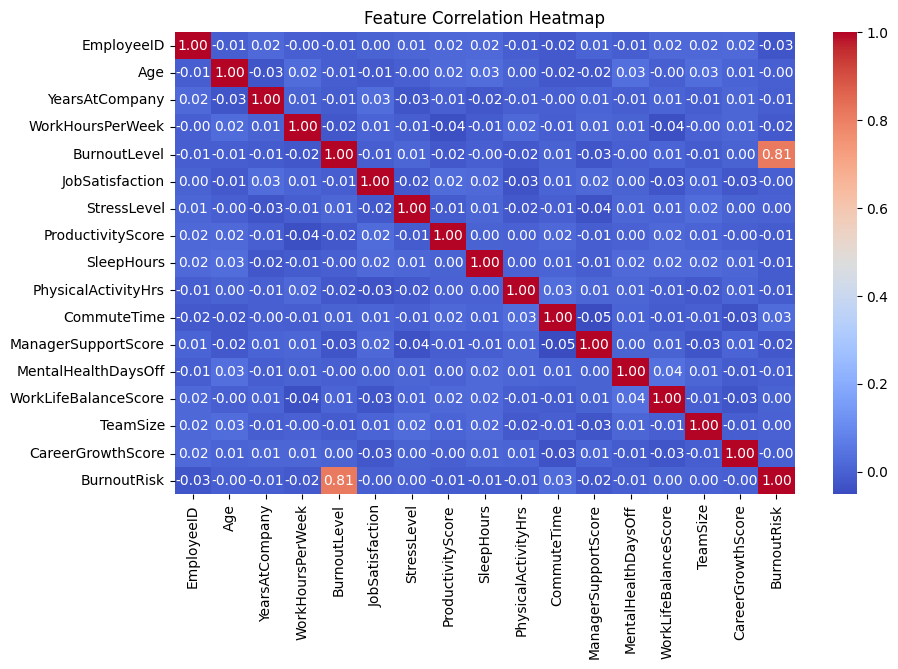

In [9]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

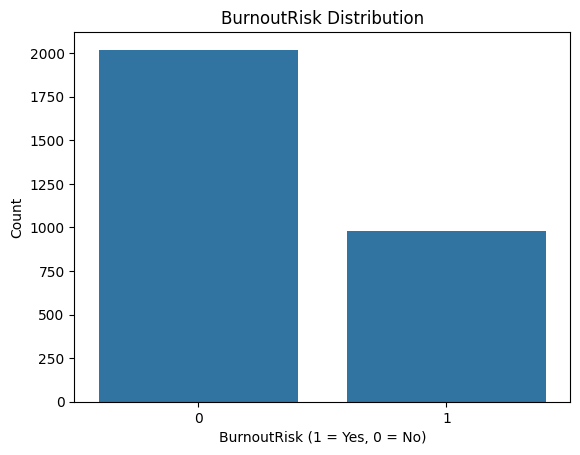

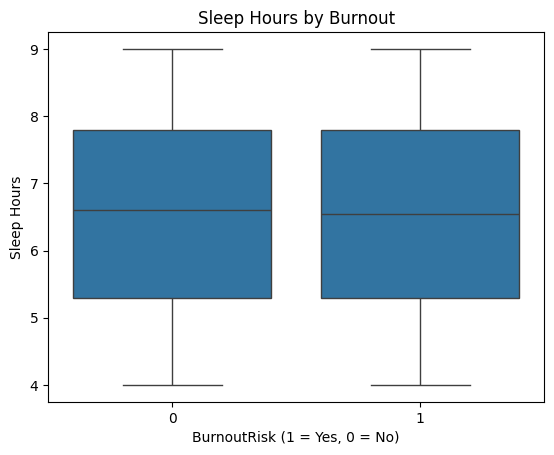

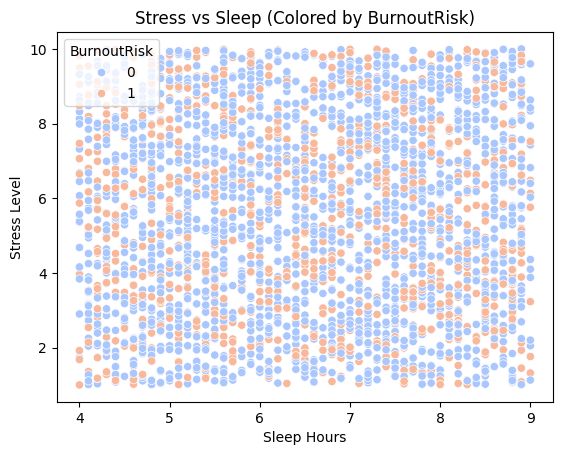

In [10]:
sns.countplot(x='BurnoutRisk', data=df)
plt.title("BurnoutRisk Distribution")
plt.xlabel("BurnoutRisk (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

sns.boxplot(x='BurnoutRisk', y='SleepHours', data=df)
plt.title("Sleep Hours by Burnout")
plt.xlabel("BurnoutRisk (1 = Yes, 0 = No)")
plt.ylabel("Sleep Hours")
plt.show()

sns.scatterplot(x='SleepHours', y='StressLevel', hue='BurnoutRisk', data=df, palette='coolwarm')
plt.title("Stress vs Sleep (Colored by BurnoutRisk)")
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.legend(title="BurnoutRisk")
plt.show()

In [17]:
corr_matrix = encoded_df.corr()
target_corr = corr_matrix['StressLevel'].sort_values(ascending=False)
selected_features_corr = target_corr[(abs(target_corr) > 0.1)].index.tolist()
selected_features_corr.remove('StressLevel')

In [18]:
X_all = encoded_df.drop('StressLevel', axis=1)
y = encoded_df['StressLevel']
selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X_all, y)
mutual_info_features = X_all.columns[selector.get_support()].tolist()

forced_features = ['Stress_WorkHours', 'Sleep_vs_Stress']

In [19]:
selected_features = list(set(selected_features_corr + mutual_info_features))

X = encoded_df[selected_features]
y = encoded_df['StressLevel']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
models = {'Linear Regression': LinearRegression(),'Ridge Regression': Ridge(alpha=1.0),'Lasso Regression': Lasso(alpha=1.0)}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R²': r2}


print("Evaluation Results:")
results_df = pd.DataFrame(results).T
print(results_df)

Evaluation Results:
                        MSE        R²
Linear Regression  1.017787 -0.041471
Ridge Regression   1.017748 -0.041432
Lasso Regression   0.979608 -0.002404


In [21]:
best_model = results_df['R²'].idxmax()
print(f"Best Performing Model: {best_model}")
print(f"Reason: {best_model} achieved the highest R², explaining most variance in StressLevel with lowest error.")


Best Performing Model: Lasso Regression
Reason: Lasso Regression achieved the highest R², explaining most variance in StressLevel with lowest error.
